In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import string

In [2]:
dataset= pd.read_csv('/content/SMSSpamCollection.tsv',sep='\t')

In [3]:
dataset.columns=['category','text']
X=dataset.iloc[:,1].values
y=dataset.iloc[:,0].values
y

array(['spam', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [4]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()
for i,j in enumerate(X) :
  temp = "".join([c.lower() for c in j if j not in string.punctuation])
  words = word_tokenize(temp)
  tokens = [lemmatizer.lemmatize(x) for x in words]
  tokens=[ps.stem(h) for h in tokens]
  X[i]=" ".join(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
dataset['text']=X
dataset['text']

0       free entri in 2 a wkli comp to win fa cup fina...
1       nah i do n't think he go to usf , he life arou...
2       even my brother is not like to speak with me ....
3                   i have a date on sunday with will ! !
4       a per your request 'mell mell ( oru minnaminun...
                              ...                        
5562    thi is the 2nd time we have tri 2 contact u. u...
5563                    will ü b go to esplanad fr home ?
5564    piti , * wa in mood for that . so ... ani othe...
5565    the guy did some bitch but i act like i 'd be ...
5566                            rofl . it true to it name
Name: text, Length: 5567, dtype: object

In [6]:
from numpy.lib.function_base import vectorize
from sklearn.feature_extraction.text import TfidfVectorizer
vectorize=TfidfVectorizer()
vectorize.fit(dataset['text'])
#vectorize.vocabulary_
#print(vectorize.idf_)
#X=vect.toarray()
vector=vectorize.transform(X)
X=vector.toarray()
X=np.asarray(X)
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
y=en.fit_transform(y)
y

array([1, 0, 0, ..., 0, 0, 0])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [10]:
y_pred=classifier.predict(X_test)

In [11]:
np.concatenate(((y_pred.reshape(len(y_pred),1)),(y_test.reshape(len(y_test),1))),1)

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [1, 1],
       [1, 1]])

In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)
acc

0.8841131664853101

In [14]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier,X=X_test,y=y_test,cv=10)

In [15]:
print("Accuracy = {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation = {:.2f}%".format(accuracies.std()*100))

Accuracy = 89.72%
Standard Deviation = 2.70%


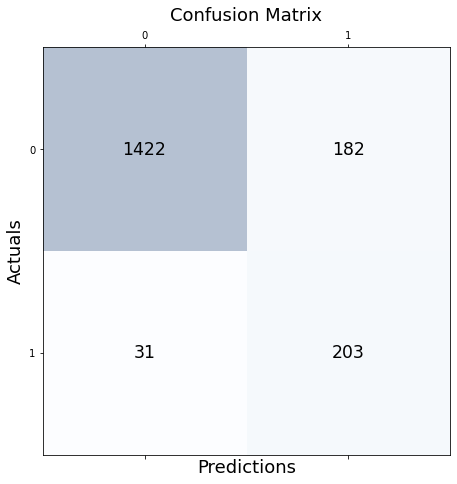

In [18]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()